In [2]:
import pandas as pd

df = pd.read_csv('train.csv').drop('id', axis=1)
df

,plate,date,price
0,X059CP797,2024-12-26 00:00:00,65000
1,Y800MH790,2024-07-12 21:31:37,100000
2,A212TX77,2024-04-18 00:00:00,290000
3,P001AY199,2025-01-03 00:27:15,680000
4,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...
51630,X023PP797,2025-01-29 00:00:00,70000
51631,M004KA161,2025-01-31 00:00:00,1600000
51632,E888EB199,2025-02-06 00:00:00,850000
51633,X023XK77,2024-04-24 11:30:07,150000


# Skew Transformation

In [5]:
df.describe()

,price
count,5.163500e+04
mean,4.532253e+05
std,1.793287e+06
min,2.000000e+04
25%,7.000000e+04
50%,1.500000e+05
75%,3.600000e+05
max,1.000000e+08


In [11]:
df

,plate,date,price
0,X059CP797,2024-12-26 00:00:00,65000
1,Y800MH790,2024-07-12 21:31:37,100000
2,A212TX77,2024-04-18 00:00:00,290000
3,P001AY199,2025-01-03 00:27:15,680000
4,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...
51630,X023PP797,2025-01-29 00:00:00,70000
51631,M004KA161,2025-01-31 00:00:00,1600000
51632,E888EB199,2025-02-06 00:00:00,850000
51633,X023XK77,2024-04-24 11:30:07,150000


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)


Before: p-value = 2.9831829666767536e-159
Box-Cox: p-value = 7.260697834436688e-46


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)


Yeo-Johnson: p-value = 7.250246950859469e-46
Quantile: p-value = 1.515347608266191e-29


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)


logarithm: p-value = 9.821686131631176e-72


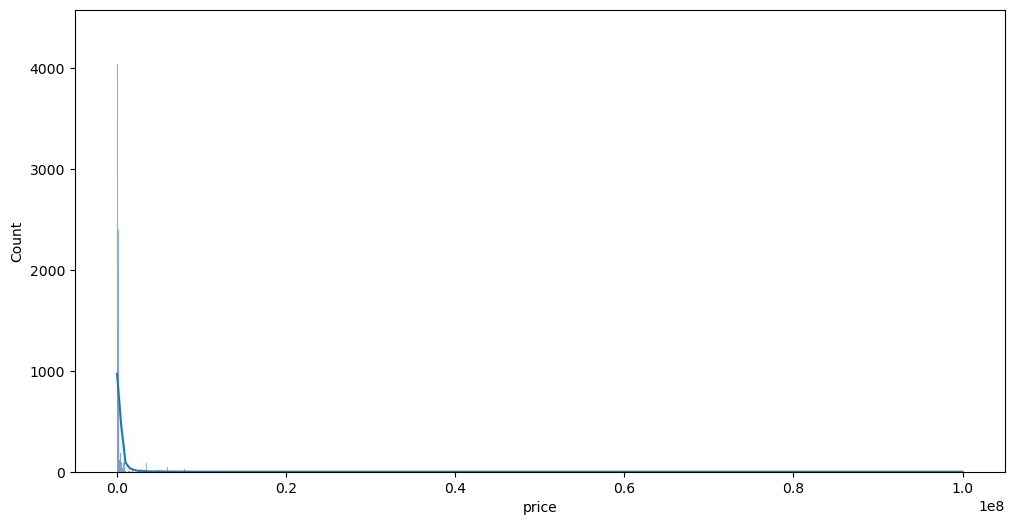

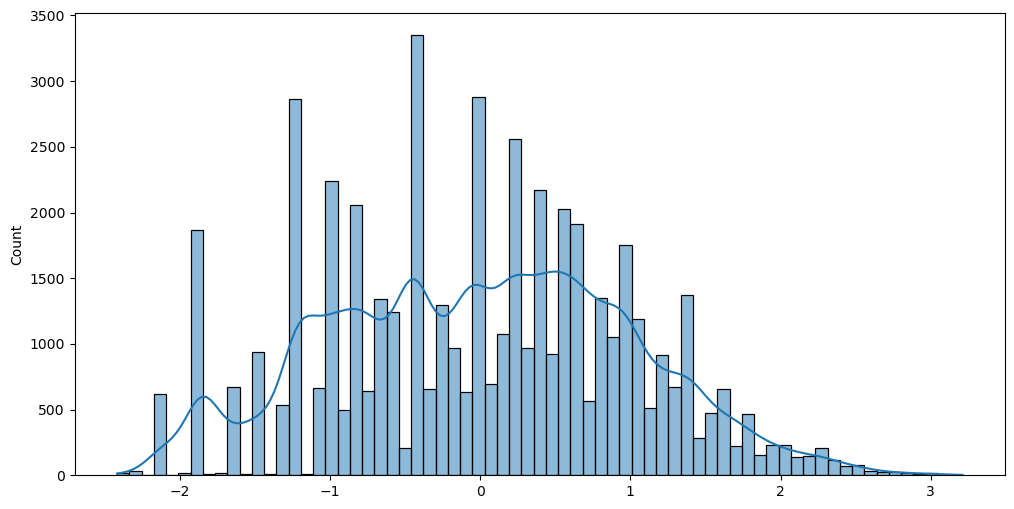

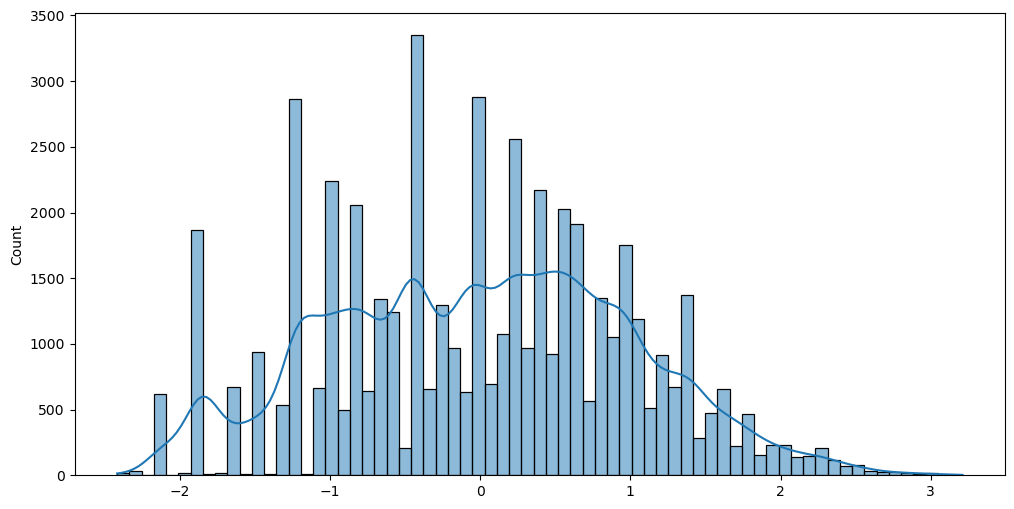

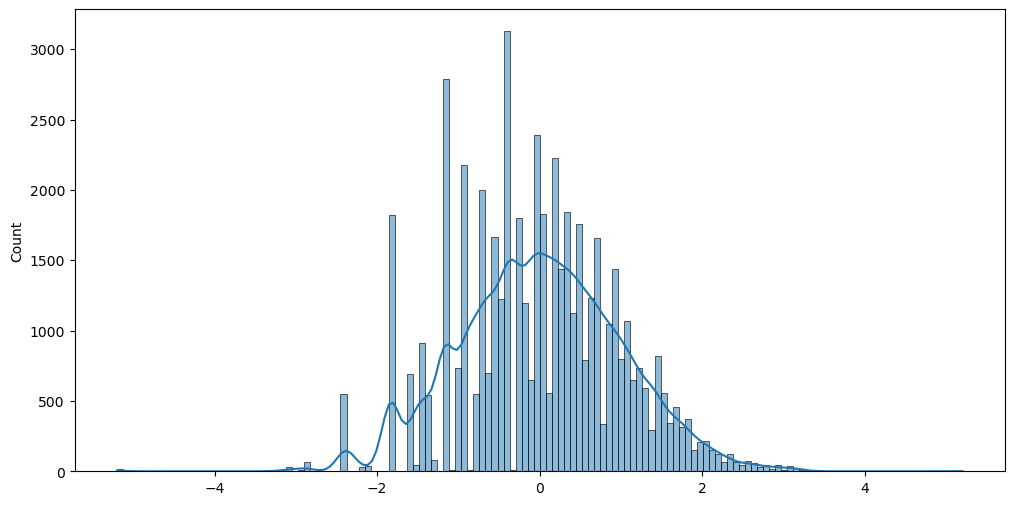

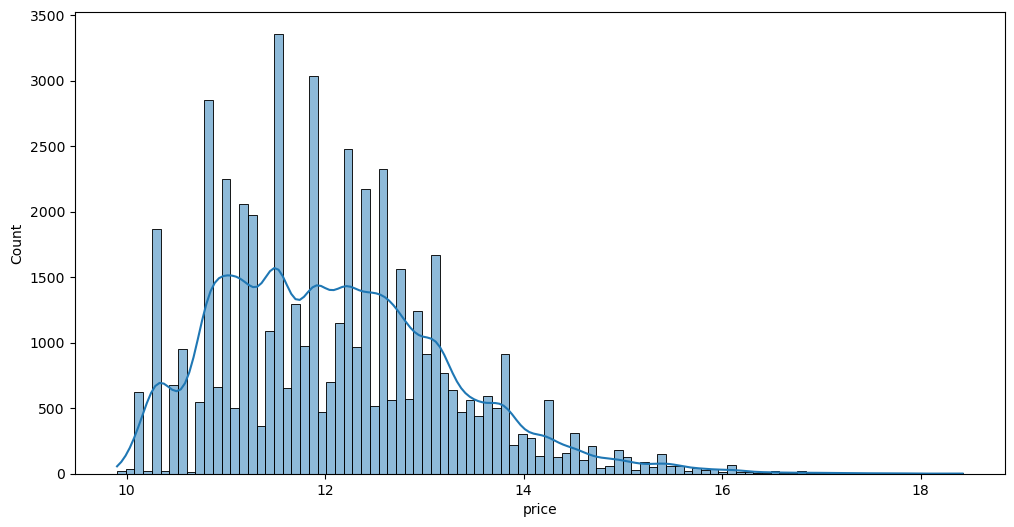

In [27]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x=df['price'],
    kde=True,
)

_, p_value = stats.shapiro(df['price'])
print(f"Before: p-value = {p_value:}")

from sklearn.preprocessing import PowerTransformer

transformers = {
    "Box-Cox": PowerTransformer(method="box-cox"),
    "Yeo-Johnson": PowerTransformer(method="yeo-johnson"),
    "Quantile": QuantileTransformer(output_distribution='normal')
}

for name, transformer in transformers.items():
    transformed = transformer.fit_transform(df[['price']])
    _, p_value = stats.shapiro(transformed.flatten())
    plt.figure(figsize=(12, 6))
    sns.histplot(
            data=df,
            x=transformed.flatten(),
            kde=True)
    plt.plot()
    print(f"{name}: p-value = {p_value}")
    df[f'price_{name}'] = transformed.flatten()

transformed = df['price'].apply(np.log1p)
_, p_value = stats.shapiro(transformed)
plt.figure(figsize=(12, 6))
sns.histplot(
        data=df,
        x=transformed,
        kde=True)
plt.plot()
print(f"logarithm: p-value = {p_value}")

df['price_log'] = df['price'].apply(np.log1p)

As we could see how much transformation help us in skewnes

In [33]:
for transformed_columns in df.columns:
    if 'price_' in transformed_columns:
        display(df[transformed_columns].describe())

count    51635.000000
mean        12.102829
std          1.158811
min          9.903538
25%         11.156265
50%         11.918397
75%         12.793862
max         18.420681
Name: price_log, dtype: float64

count    5.163500e+04
mean    -1.084907e-15
std      1.000010e+00
min     -2.416163e+00
25%     -8.203585e-01
50%     -4.290573e-02
75%      7.041052e-01
max      3.211052e+00
Name: price_Box-Cox, dtype: float64

count    5.163500e+04
mean    -2.587044e-15
std      1.000010e+00
min     -2.416143e+00
25%     -8.203610e-01
50%     -4.290661e-02
75%      7.041068e-01
max      3.211027e+00
Name: price_Yeo-Johnson, dtype: float64

count    51635.000000
mean         0.002112
std          0.993685
min         -5.199338
25%         -0.716839
50%         -0.055229
75%          0.675277
max          5.199338
Name: price_Quantile, dtype: float64

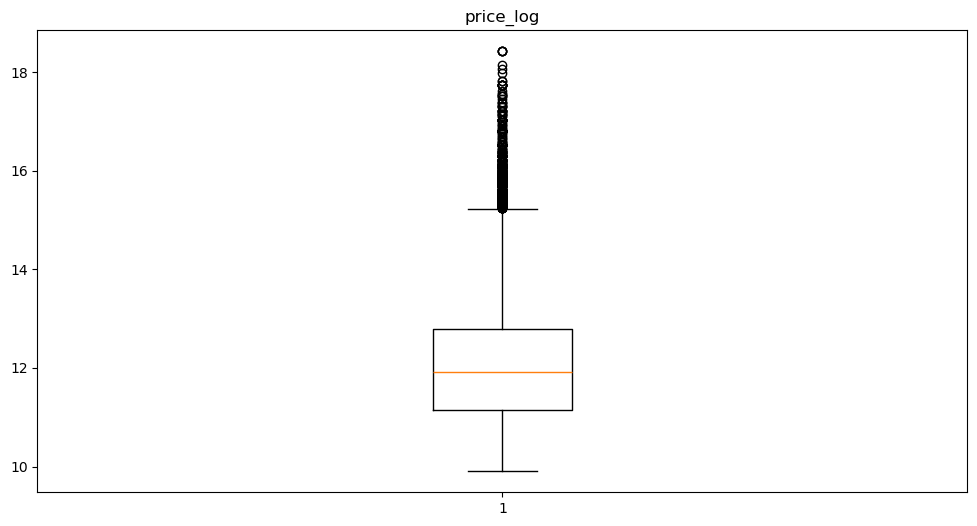

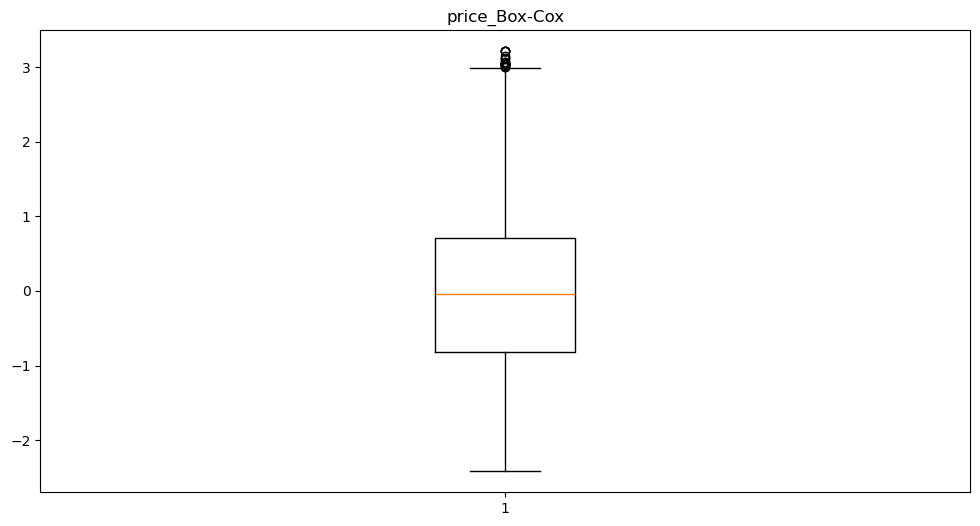

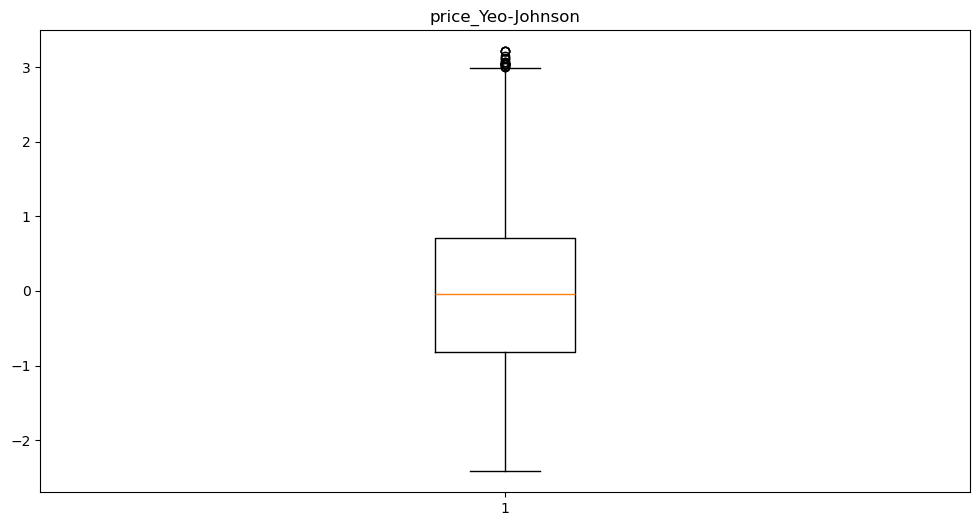

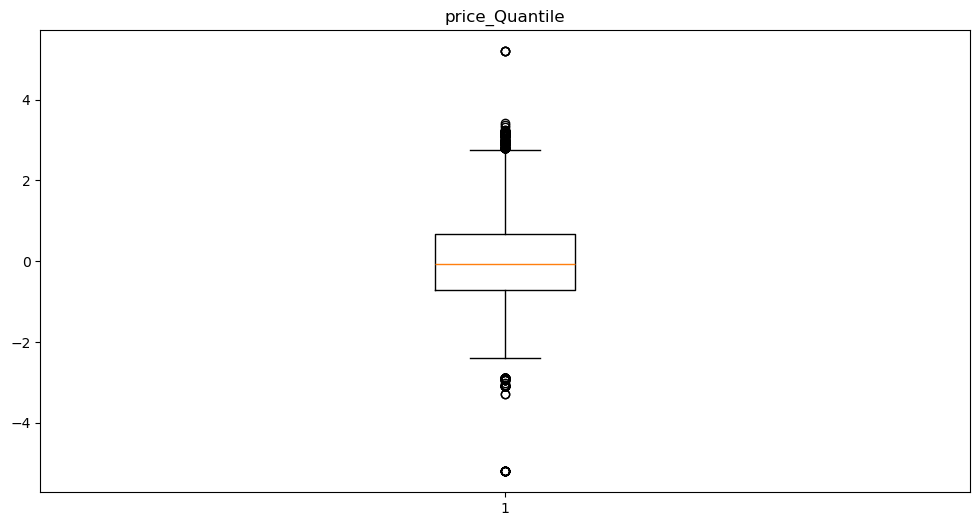

In [37]:
from matplotlib import pyplot as plt


for transformed_column in df.columns:
    if 'price_' in transformed_column:
        plt.figure(figsize=(12, 6))
        plt.boxplot(df[transformed_column])
        plt.title(transformed_column)
        plt.plot


# Feature engineering

In [39]:
df['plate_length'] = df['plate'].str.len()

In [41]:
df['plate_length'].value_counts()

plate_length
9    36195
8    15440
Name: count, dtype: int64

In [43]:
df.groupby('plate_length').describe().T

plate_length                        8             9
price             count  1.544000e+04  3.619500e+04
                  mean   8.006511e+05  3.050210e+05
                  std    2.813470e+06  1.066669e+06
                  min    2.000000e+04  2.000000e+04
                  25%    1.200000e+05  6.500000e+04
                  50%    2.900000e+05  1.300000e+05
                  75%    6.000000e+05  2.900000e+05
                  max    1.000000e+08  1.000000e+08
price_log         count  1.544000e+04  3.619500e+04
                  mean   1.260510e+01  1.188857e+01
                  std    1.236115e+00  1.053746e+00
                  min    9.903538e+00  9.903538e+00
                  25%    1.169526e+01  1.108216e+01
                  50%    1.257764e+01  1.177530e+01
                  75%    1.330469e+01  1.257764e+01
                  max    1.842068e+01  1.842068e+01
price_Box-Cox     count  1.544000e+04  3.619500e+04
                  mean   4.239626e-01 -1.808532e-01
                  std    9.817824e-01  9.518769e-01
                  min   -2.416163e+00 -2.416163e+00
                  25%   -2.572868e-01 -9.030939e-01
                  50%    5.326772e-01 -1.791821e-01
                  75%    1.078332e+00  5.326772e-01
                  max    3.211052e+00  3.211052e+00
price_Yeo-Johnson count  1.544000e+04  3.619500e+04
                  mean   4.239627e-01 -1.808533e-01
                  std    9.817822e-01  9.518770e-01
                  min   -2.416143e+00 -2.416143e+00
                  25%   -2.572884e-01 -9.030964e-01
                  50%    5.326783e-01 -1.791835e-01
                  75%    1.078334e+00  5.326783e-01
                  max    3.211027e+00  3.211027e+00
price_Quantile    count  1.544000e+04  3.619500e+04
                  mean   4.191960e-01 -1.758070e-01
                  std    9.885156e-01  9.412447e-01
                  min   -5.199338e+00 -5.199338e+00
                  25%   -2.355088e-01 -8.004961e-01
                  50%    4.445339e-01 -1.752784e-01
                  75%    1.070745e+00  4.445339e-01
                  max    5.199338e+00  5.199338e+00

In [45]:
# Split region and registration code from the plate

df['region'] = df['plate'].apply(lambda x: x[-2:] if len(x) == 8 else x[-3:])
df['registration_code'] = df['plate'].apply(lambda x: x[1:4])
df['series_part_1'] = df['plate'].apply(lambda x: x[0])
df['series_part_2'] = df['plate'].apply(lambda x: x[4:6])
df['series'] = df['plate'].apply(lambda x: x[0] + x[4:6])

In [53]:
# get the mean price for each duplicate plate (I see some of them are use the highest)
for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        df[transformed_column] = df.groupby('plate')[transformed_column].transform('mean')
        df = df.drop_duplicates(subset='plate').reset_index(drop=True)

display(df.describe())

,price,price_log,price_Box-Cox,price_Yeo-Johnson,price_Quantile,plate_length
count,4.360500e+04,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000
mean,4.362646e+05,12.032899,-0.066429,-0.066429,-0.061477,8.695723
std,1.842495e+06,1.159436,1.007076,1.007075,1.000916,0.460106
min,2.000000e+04,9.903538,-2.416163,-2.416143,-5.199338,8.000000
25%,7.000000e+04,11.156265,-0.820359,-0.820361,-0.716839,8.000000
50%,1.500000e+05,11.918397,-0.042906,-0.042907,-0.055229,9.000000
75%,3.500000e+05,12.765691,0.682227,0.682228,0.633317,9.000000
max,1.000000e+08,18.420681,3.211052,3.211027,5.199338,9.000000


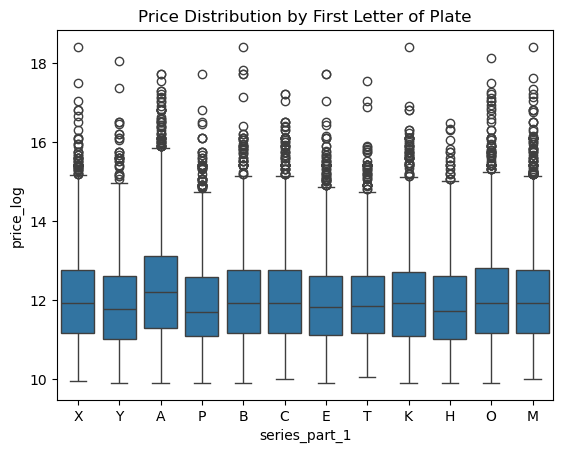

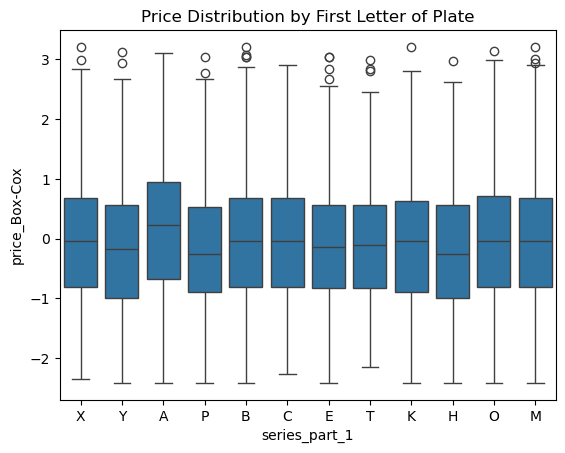

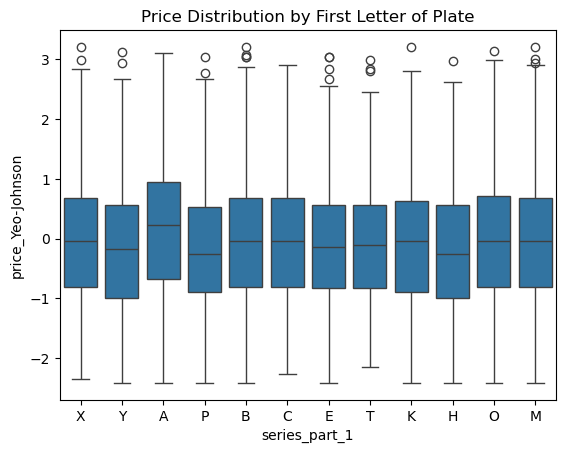

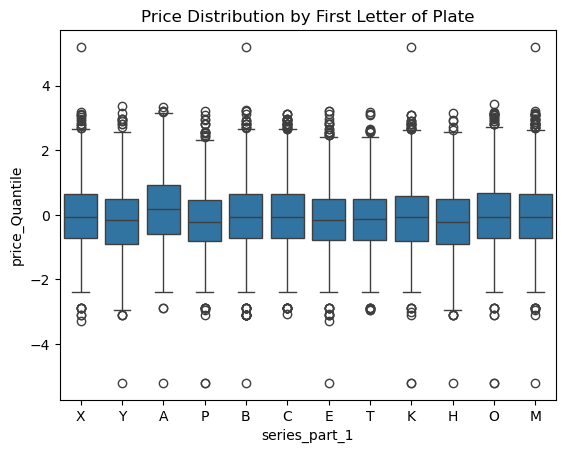

In [57]:
# findout whether the first letter is important or not 

# df.groupby('digit_1').describe()['price']


import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        data = pd.concat((df['series_part_1'], df[transformed_column]), axis=1)
        
        sns.boxplot(x='series_part_1', y=transformed_column, data=data)
        plt.title('Price Distribution by First Letter of Plate')
        plt.show()

In [59]:
import pandas as pd
import scipy.stats as stats


for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        data = pd.concat((df['series_part_1'], df[transformed_column]), axis=1)
        
        
        groups = [group[transformed_column].values for _, group in data.groupby("series_part_1")]
        
        h_stat, p_value = stats.kruskal(*groups)
        print(f"Kruskal-Wallis H-statistic for {transformed_column}: {h_stat}, p-value: {p_value}")

Kruskal-Wallis H-statistic for price_log: 412.5044208525238, p-value: 1.352922426936859e-81
Kruskal-Wallis H-statistic for price_Box-Cox: 414.0548292174624, p-value: 6.337262546752986e-82
Kruskal-Wallis H-statistic for price_Yeo-Johnson: 414.0548292174624, p-value: 6.337262546752986e-82
Kruskal-Wallis H-statistic for price_Quantile: 414.0548292174624, p-value: 6.337262546752986e-82


as we see we have more monotonic correlation instead of linear.

In [61]:
def digit_symmetry(plate):
    registration = plate[1:4]
    region = plate[6:]
    nums = registration + region

    return int(nums == nums[::-1])

df['digit_symmetry'] = df['plate'].apply(digit_symmetry)

In [63]:
df['registration_symmetry'] = df['registration_code'].apply(lambda x: int(x == x[::-1]))

In [65]:
df['region_symmetry'] = df['region'].apply(lambda x: int(x == x[::-1]))

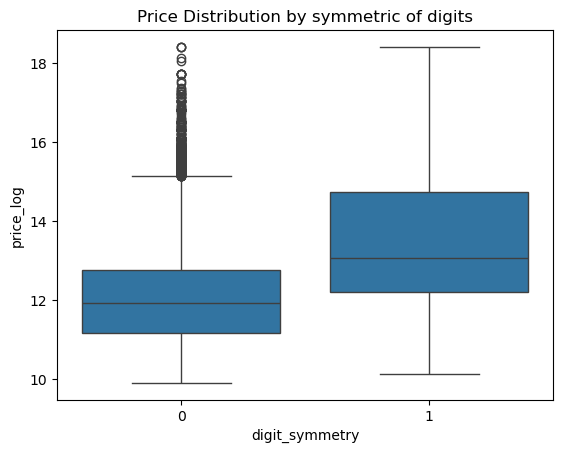

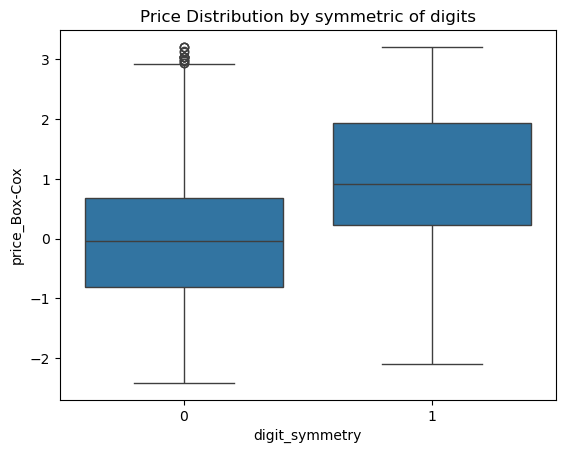

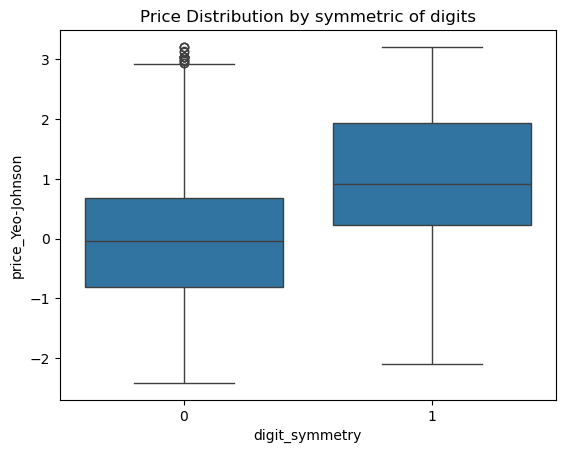

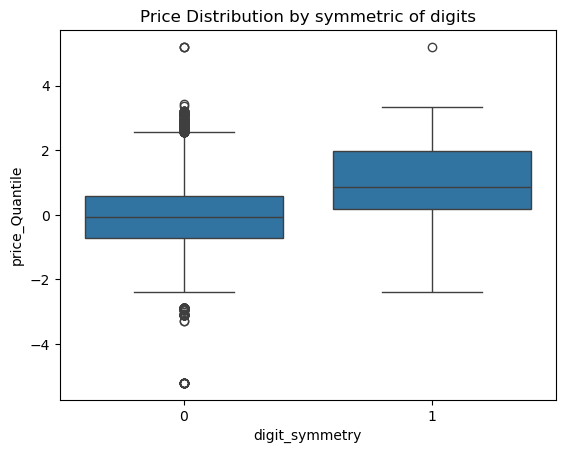

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        sns.boxplot(x='digit_symmetry', y=transformed_column, data=df)
        plt.title('Price Distribution by symmetric of digits')
        plt.show()

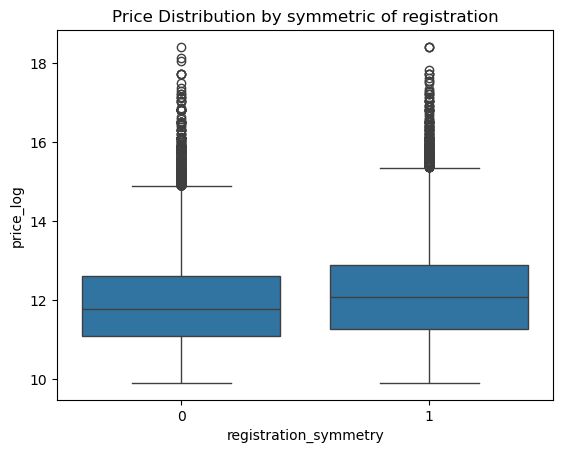

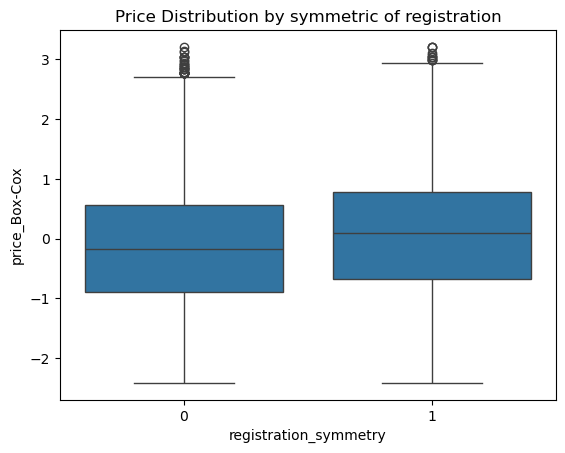

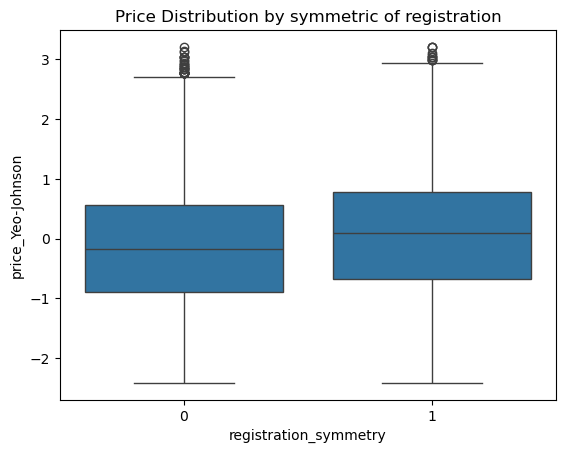

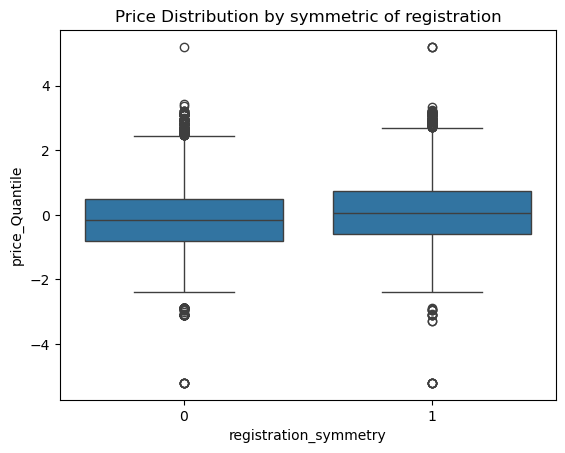

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='registration_symmetry', y=transformed_column, data=df)
        plt.title('Price Distribution by symmetric of registration')
        plt.show()

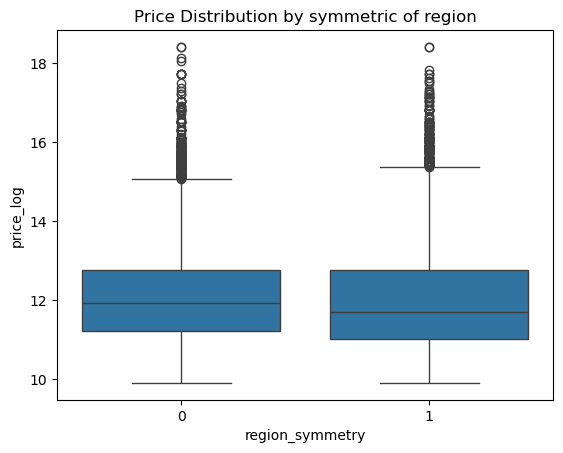

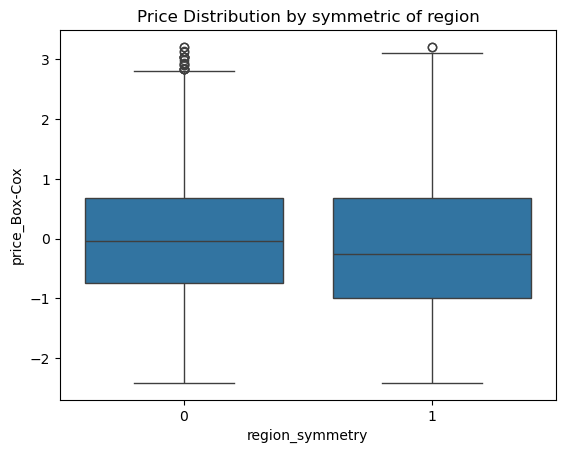

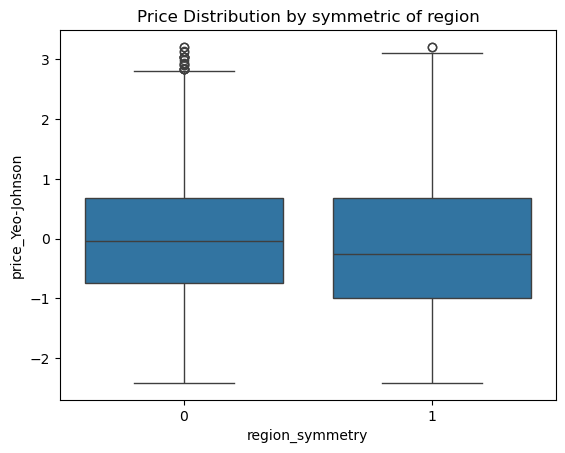

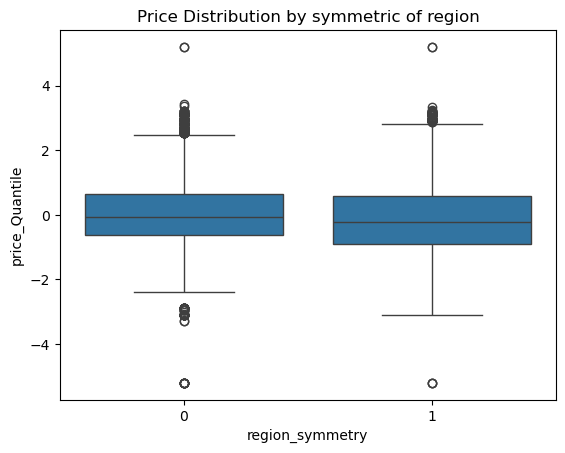

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='region_symmetry', y=transformed_column, data=df)
        plt.title('Price Distribution by symmetric of region')
        plt.show()

In [73]:
from collections import Counter


def frequency_score(num_str):
    counts = Counter(num_str)
    max_freq = max(counts.values())
    return round(max_freq / len(num_str), 2)

def frequency_score_plate(plate):
    registration = plate[1:4]
    region = plate[6:]
    digits = registration + region
    
    counts = Counter(digits)
    max_freq = max(counts.values())
    return round(max_freq / len(digits), 2)

In [75]:
df['digits_frequency'] = df['plate'].apply(frequency_score_plate)
df['region_frequency'] = df['region'].apply(frequency_score)
df['registration_frequency'] = df['registration_code'].apply(frequency_score) 

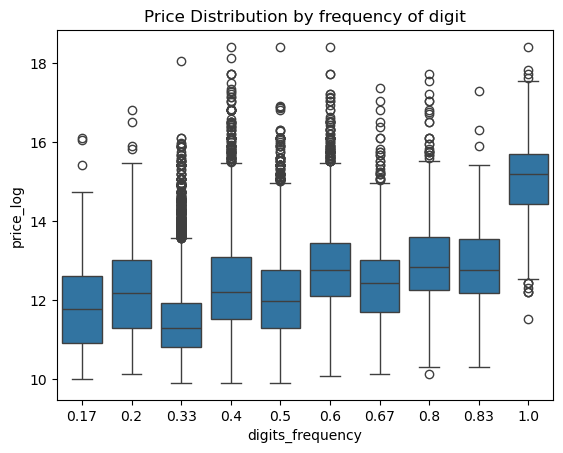

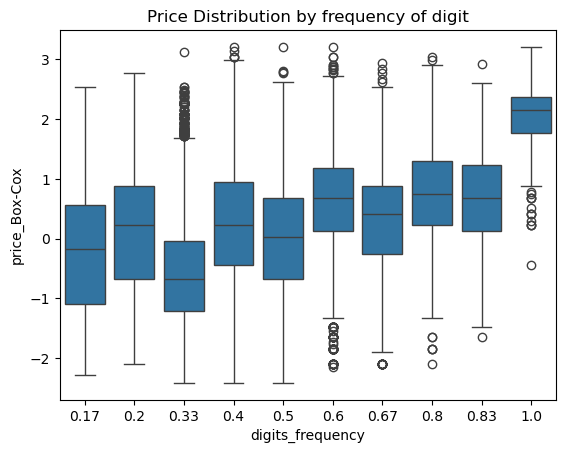

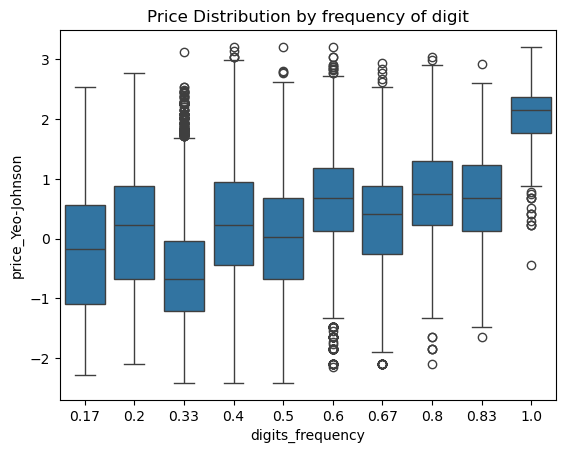

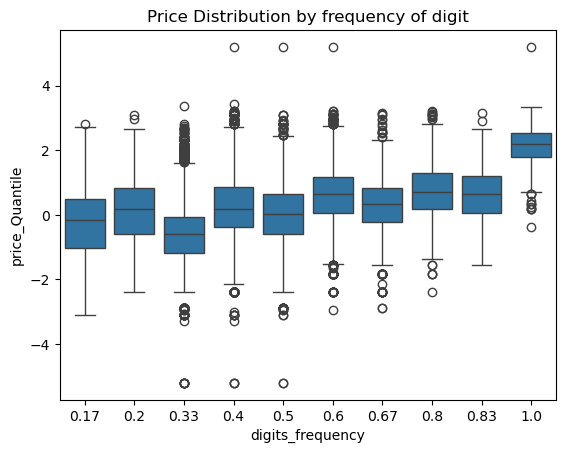

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='digits_frequency', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of digit')
        
        plt.show()

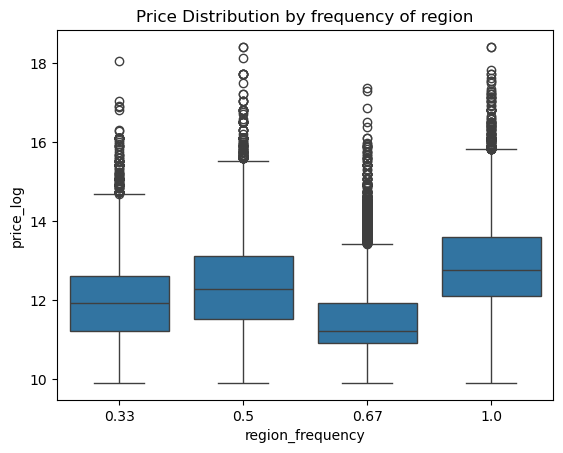

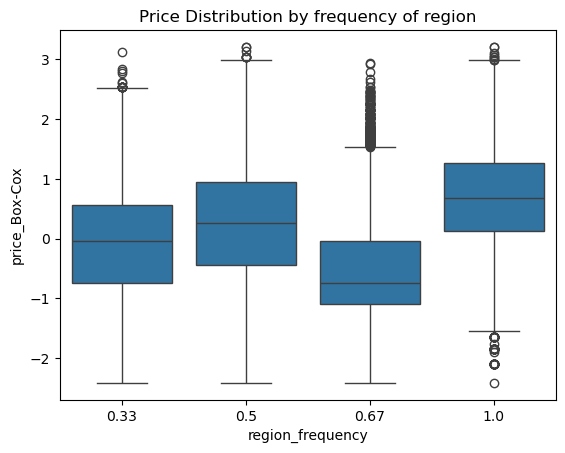

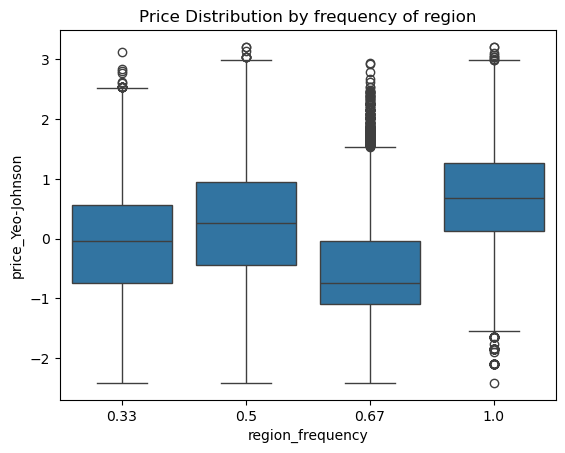

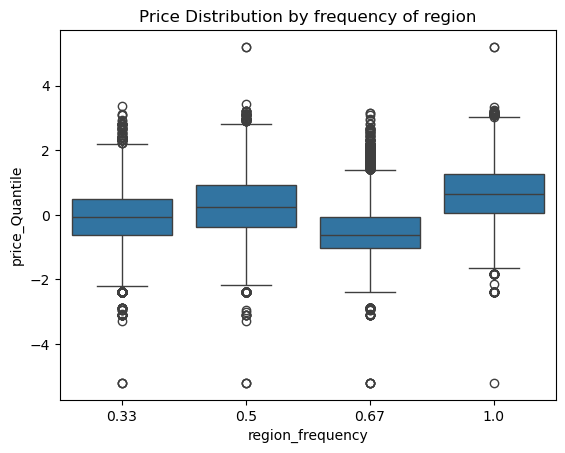

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='region_frequency', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of region')
        
        plt.show()

In [81]:
df['registration_frequency'].describe()

count    43605.000000
mean         0.624209
std          0.216875
min          0.330000
25%          0.330000
50%          0.670000
75%          0.670000
max          1.000000
Name: registration_frequency, dtype: float64

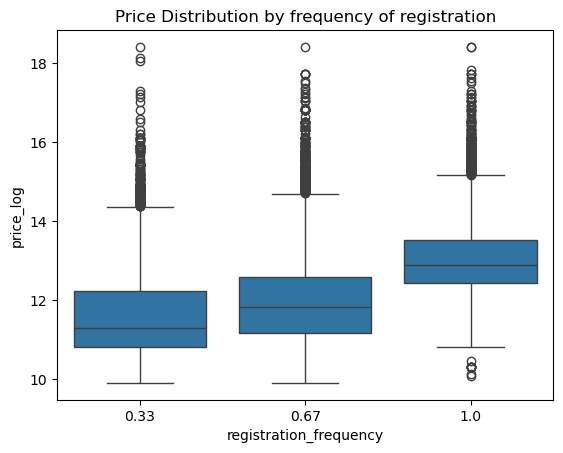

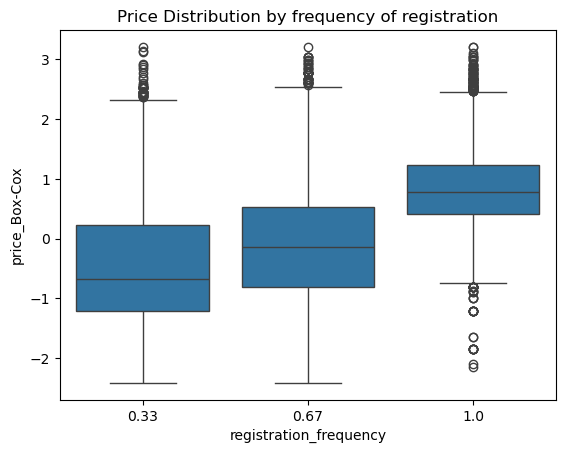

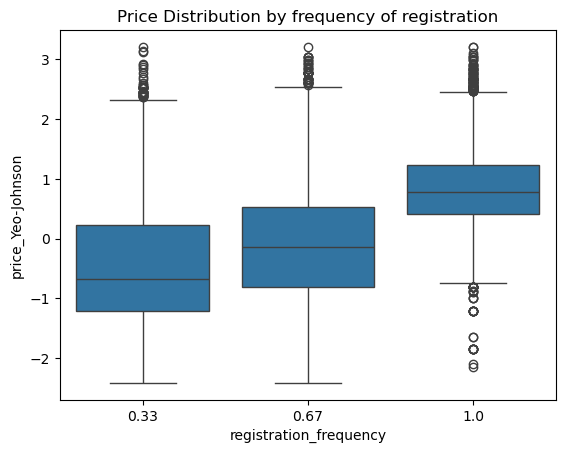

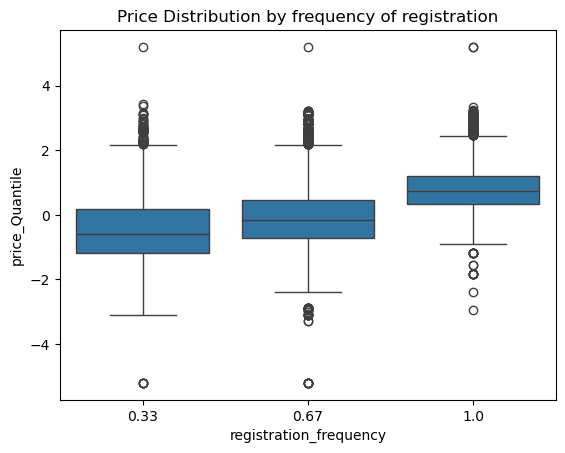

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='registration_frequency', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of registration')
        
        plt.show()

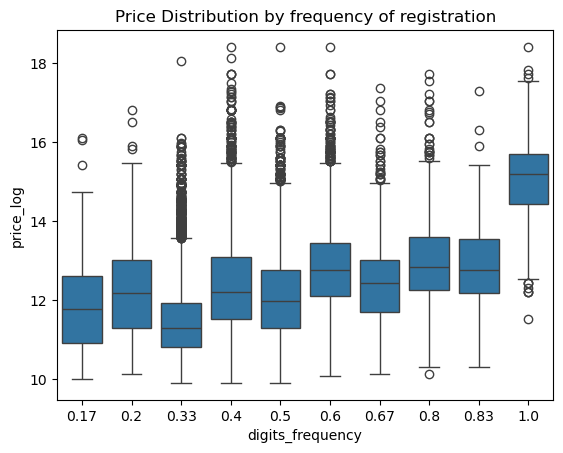

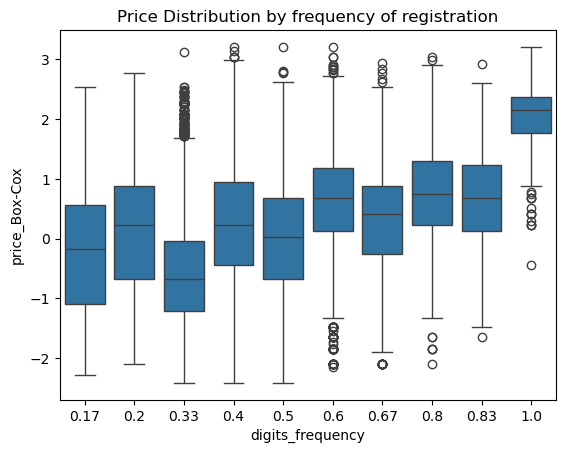

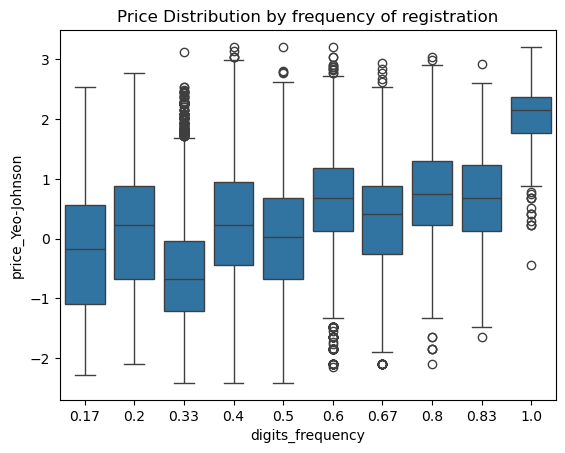

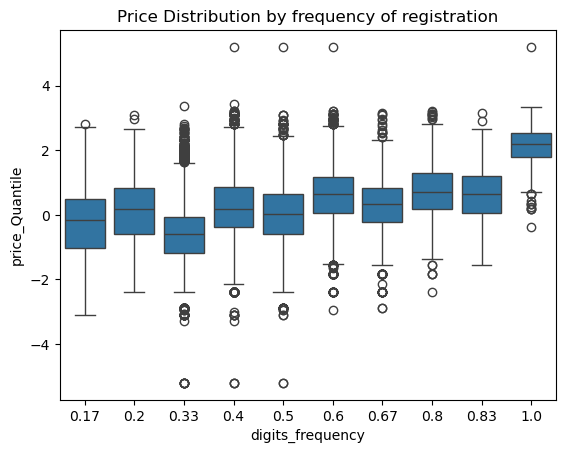

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker



for transformed_column in df.columns:
    if 'price_' in transformed_column:         
        sns.boxplot(x='digits_frequency', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of registration')
        
        plt.show()

<Axes: >

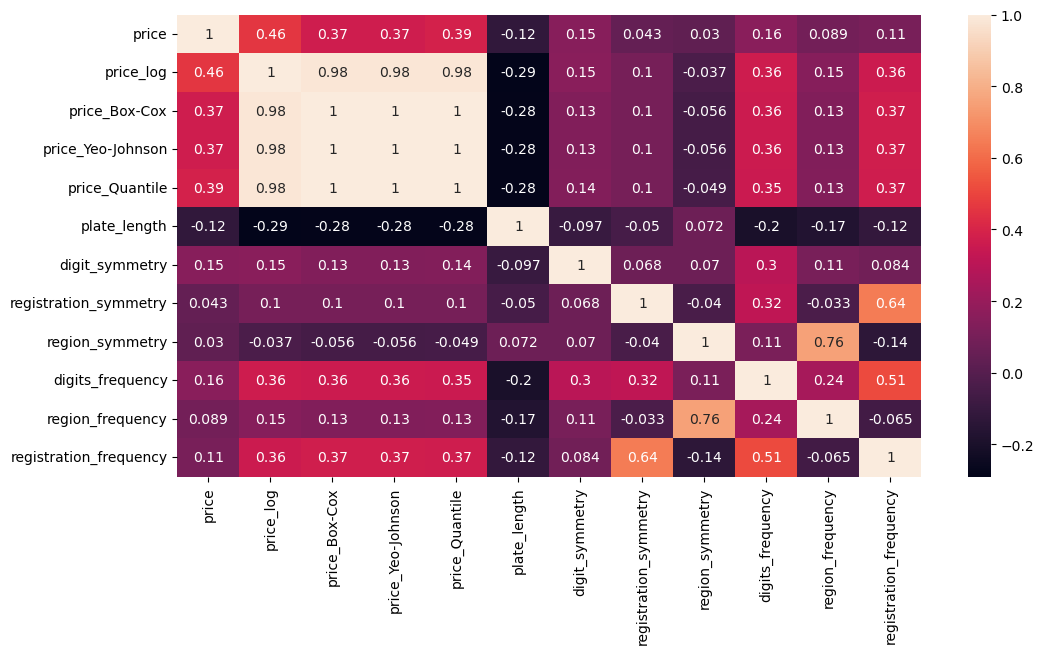

In [89]:
import seaborn as sns

plt.figure(figsize=(12, 6))
corr = df.select_dtypes(['int64', 'float64']).corr(method='pearson')
sns.heatmap(corr, annot=True)

<Axes: >

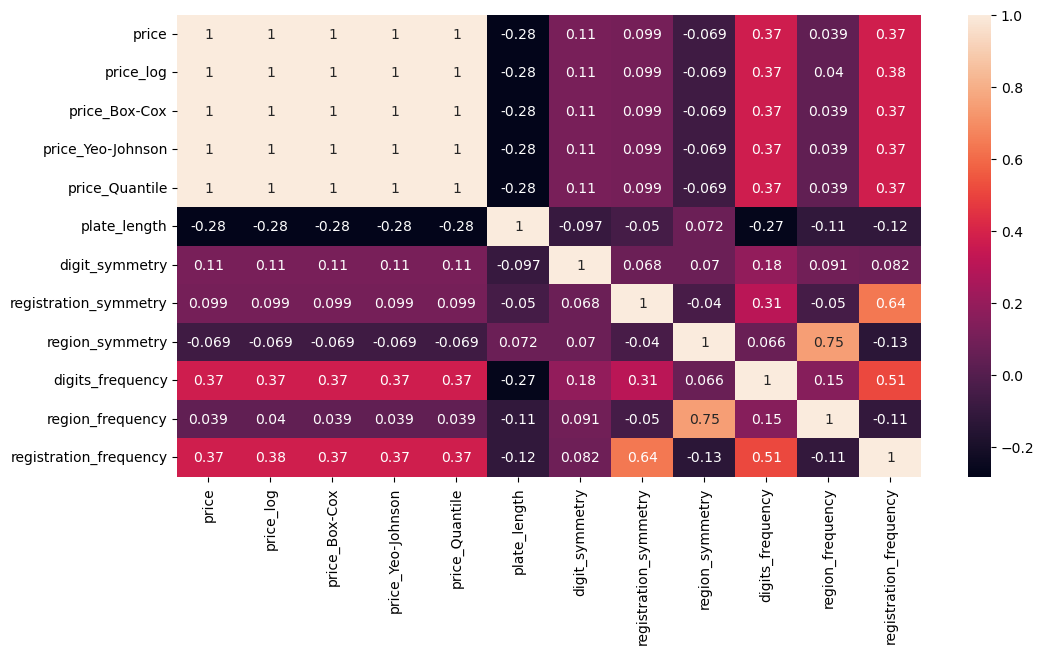

In [91]:
import seaborn as sns

plt.figure(figsize=(12, 6))
corr = df.select_dtypes(['int64', 'float64']).corr(method='spearman')
sns.heatmap(corr, annot=True)

In [93]:
df['series_symmetry'] = df['series'].apply(lambda x: int(x == x[::-1]))

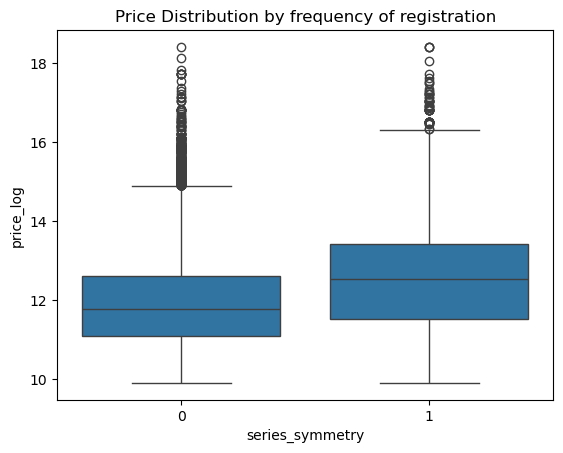

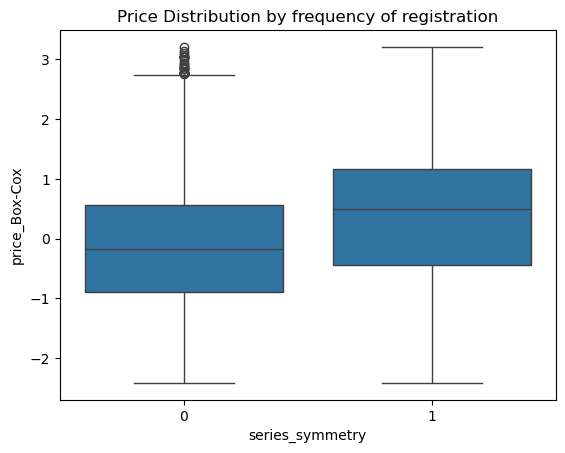

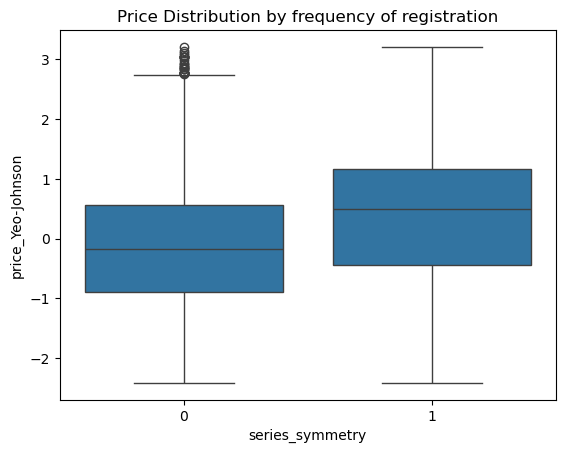

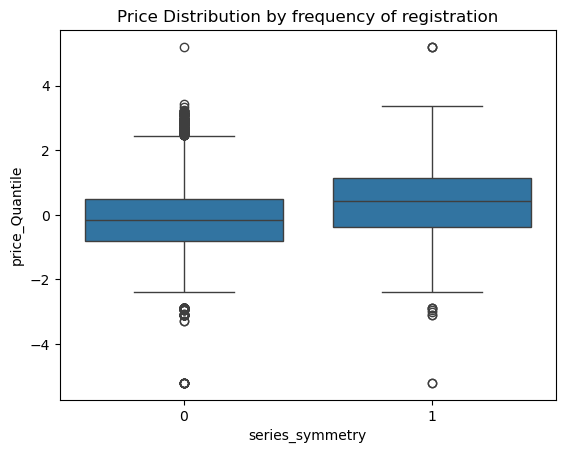

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        sns.boxplot(x='series_symmetry', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of registration')
        
        plt.show()

In [97]:
import pandas as pd
import scipy.stats as stats


for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        groups = [group[transformed_column].values for _, group in df.groupby("series_symmetry")]
        
        h_stat, p_value = stats.kruskal(*groups)
        print(f"Kruskal-Wallis H-statistic for {transformed_column}: {h_stat}, p-value: {p_value}")

Kruskal-Wallis H-statistic for price_log: 1802.1997451122352, p-value: 0.0
Kruskal-Wallis H-statistic for price_Box-Cox: 1789.8088894380505, p-value: 0.0
Kruskal-Wallis H-statistic for price_Yeo-Johnson: 1789.8088894380505, p-value: 0.0
Kruskal-Wallis H-statistic for price_Quantile: 1789.8088894380505, p-value: 0.0


In [99]:
import pandas as pd

df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

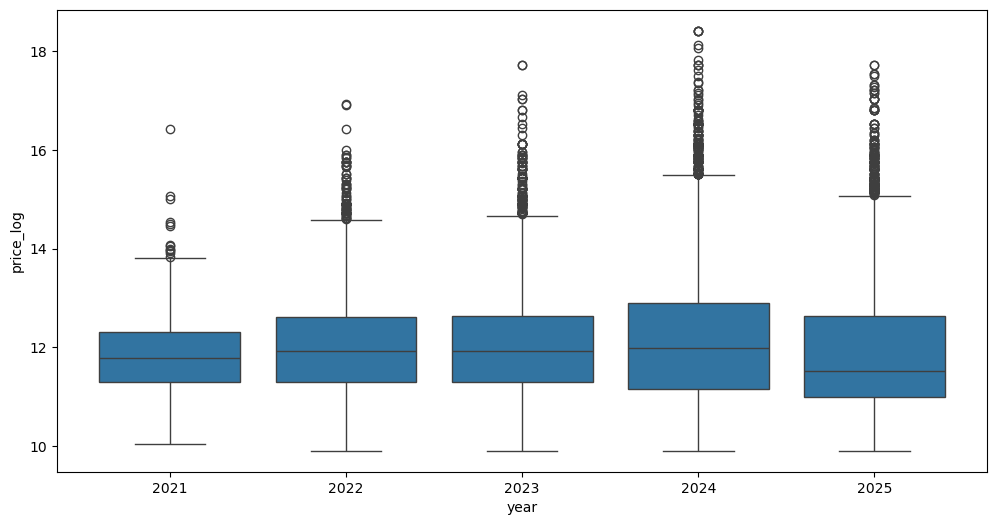

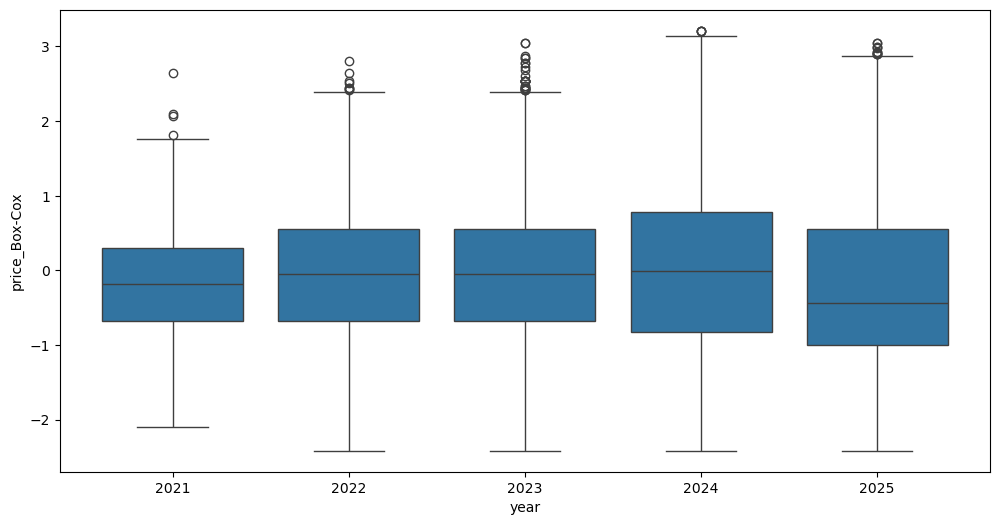

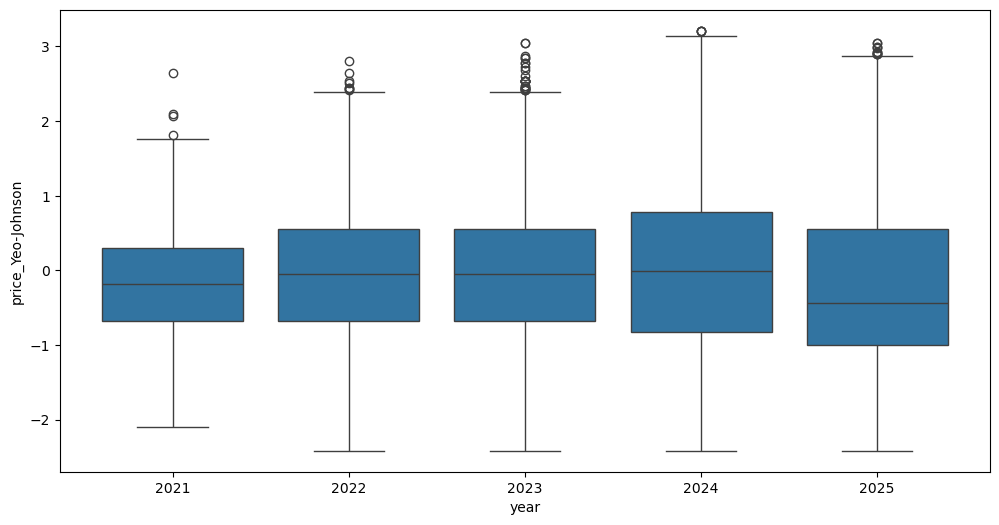

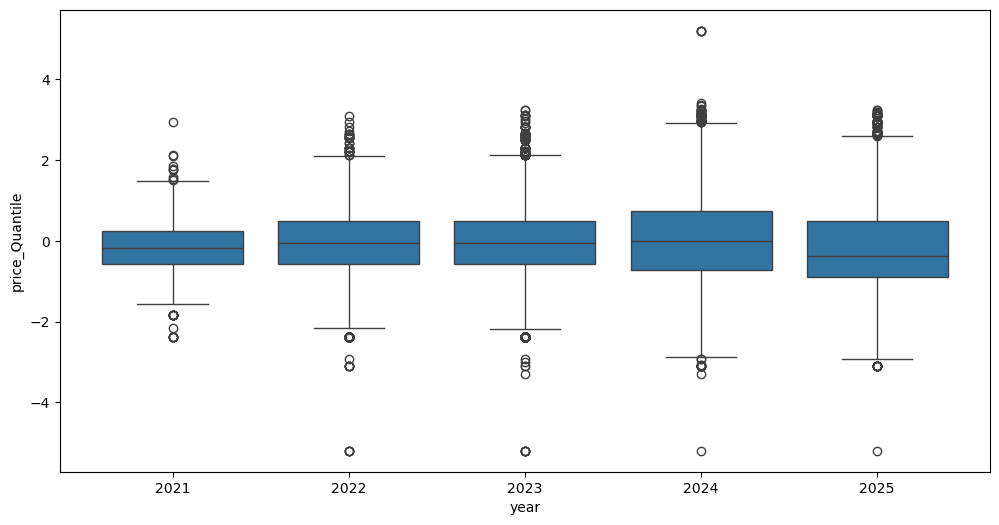

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt



for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        plt.figure(figsize=(12, 6))
        sns.boxplot(
            data=df,
            x='year',
            y=transformed_column
        )
        plt.plot()

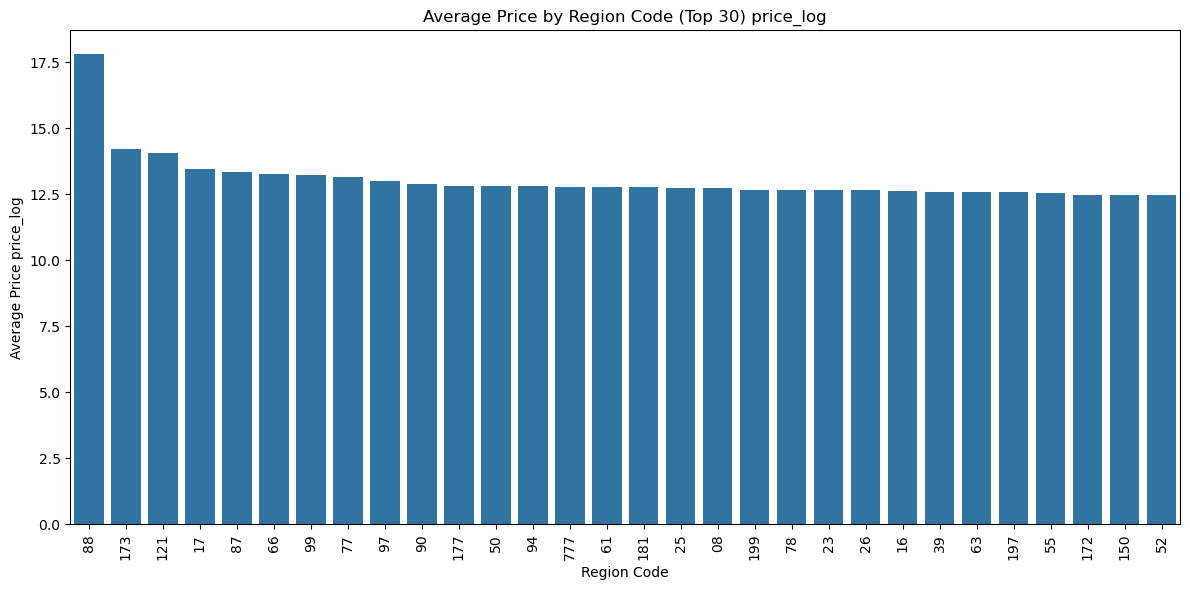

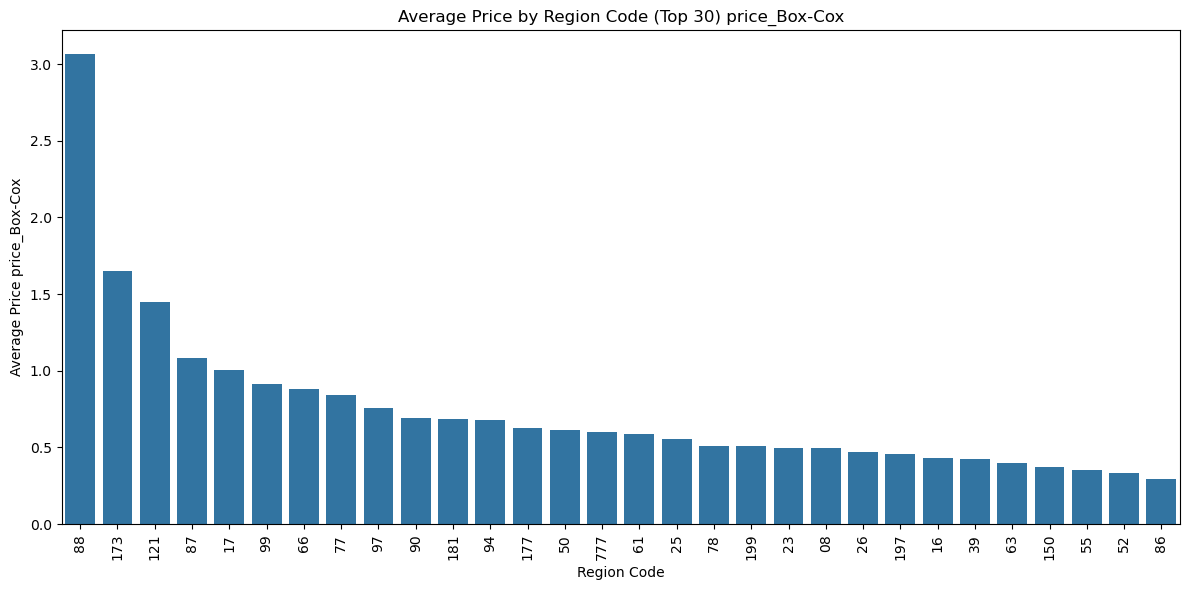

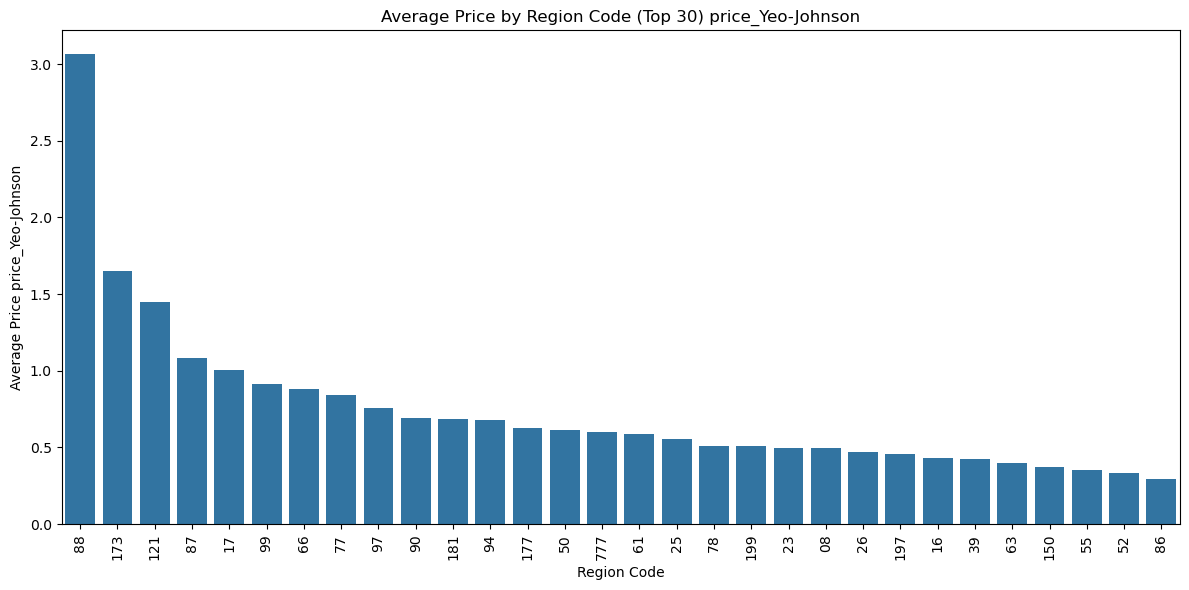

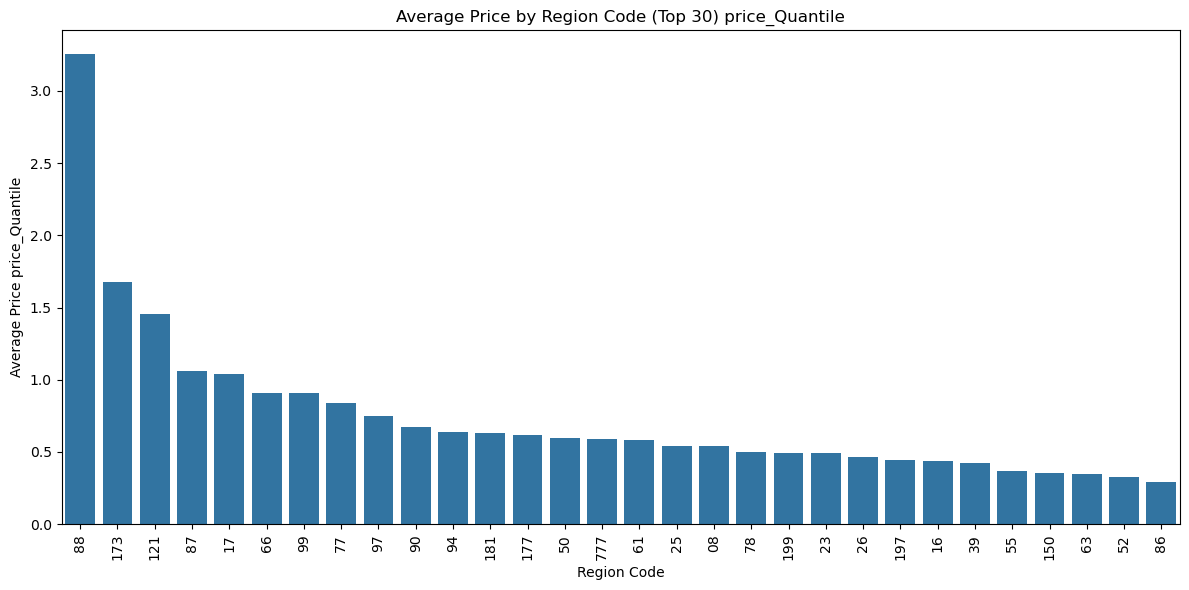

In [113]:
for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        plt.figure(figsize=(12, 6))
        region_avg_price = df.groupby('region')[transformed_column].mean().sort_values(ascending=False).head(30)
        sns.barplot(x=region_avg_price.index, y=region_avg_price.values)
        plt.title(f'Average Price by Region Code (Top 30) {transformed_column}')
        plt.xticks(rotation=90)
        plt.xlabel('Region Code')
        plt.ylabel(f'Average Price {transformed_column}')
        plt.tight_layout()
        plt.show()

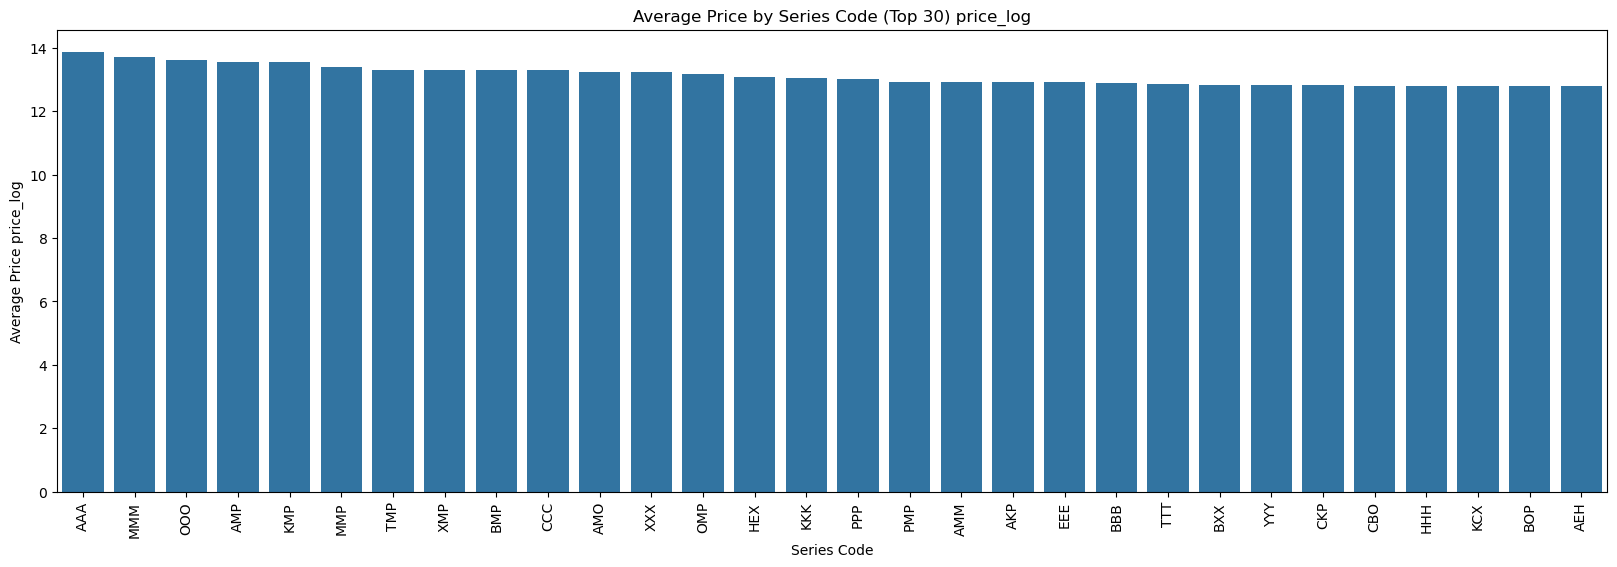

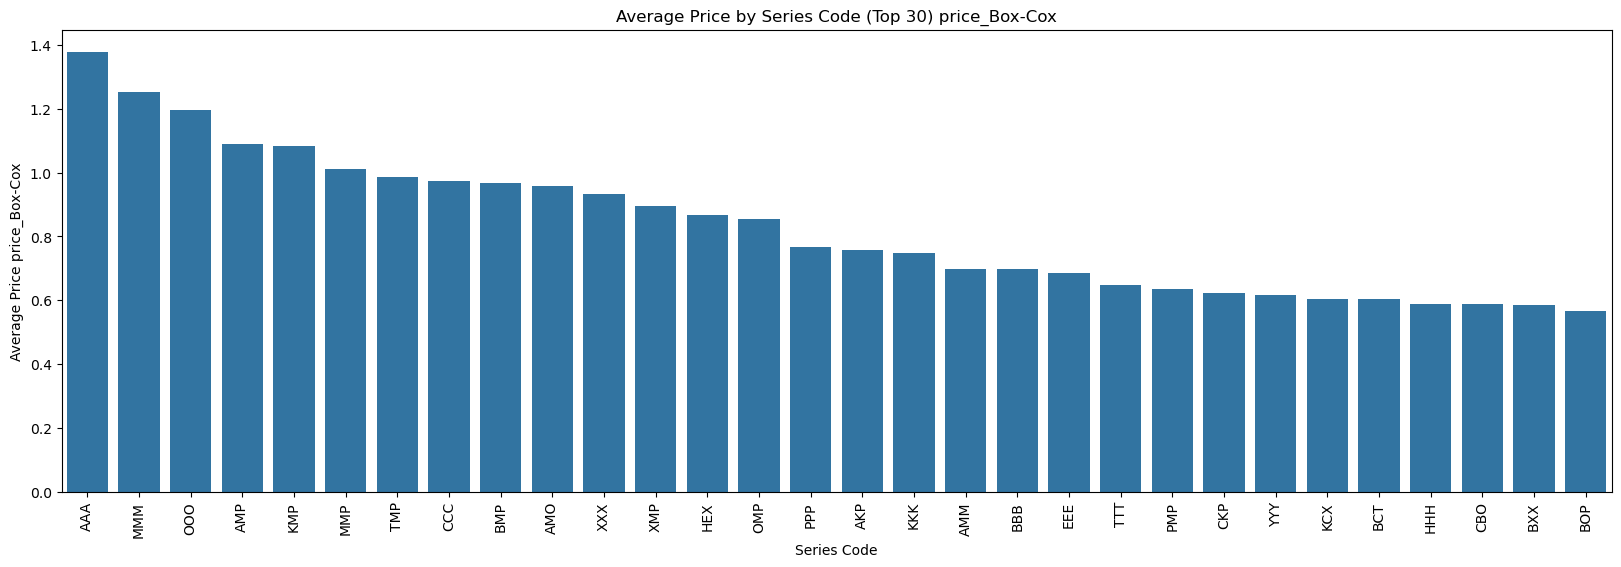

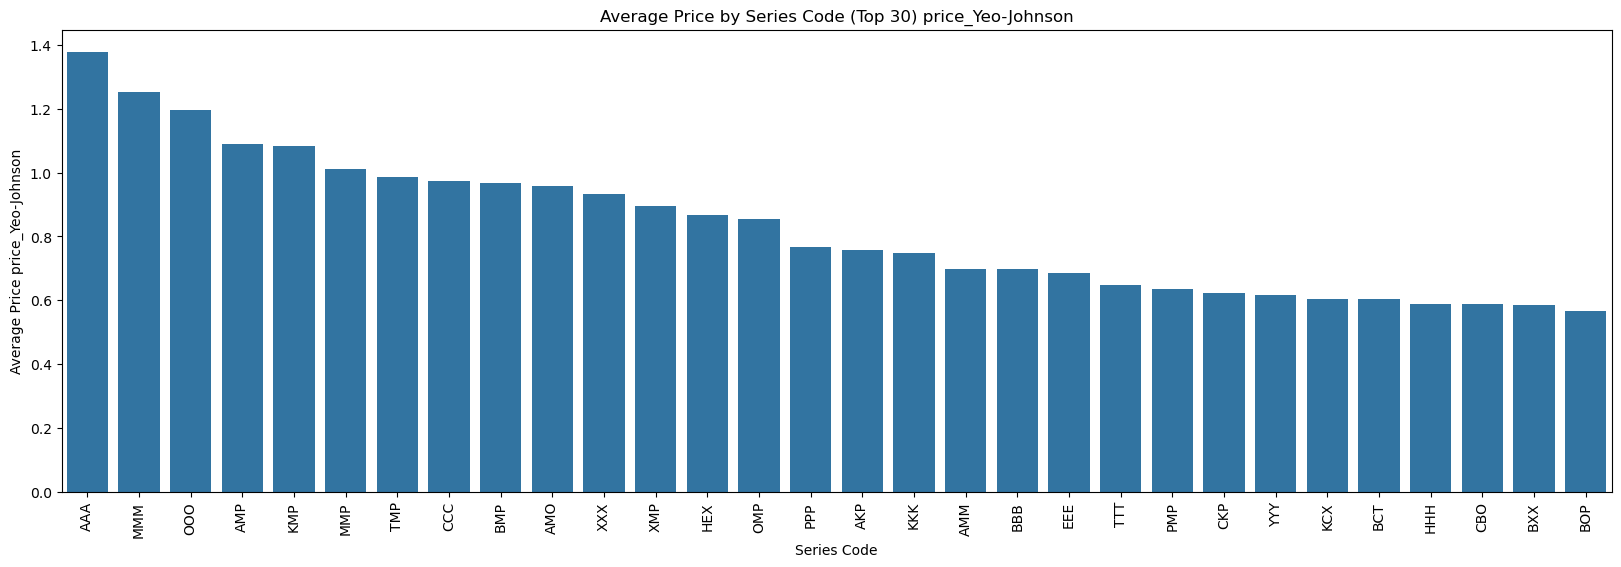

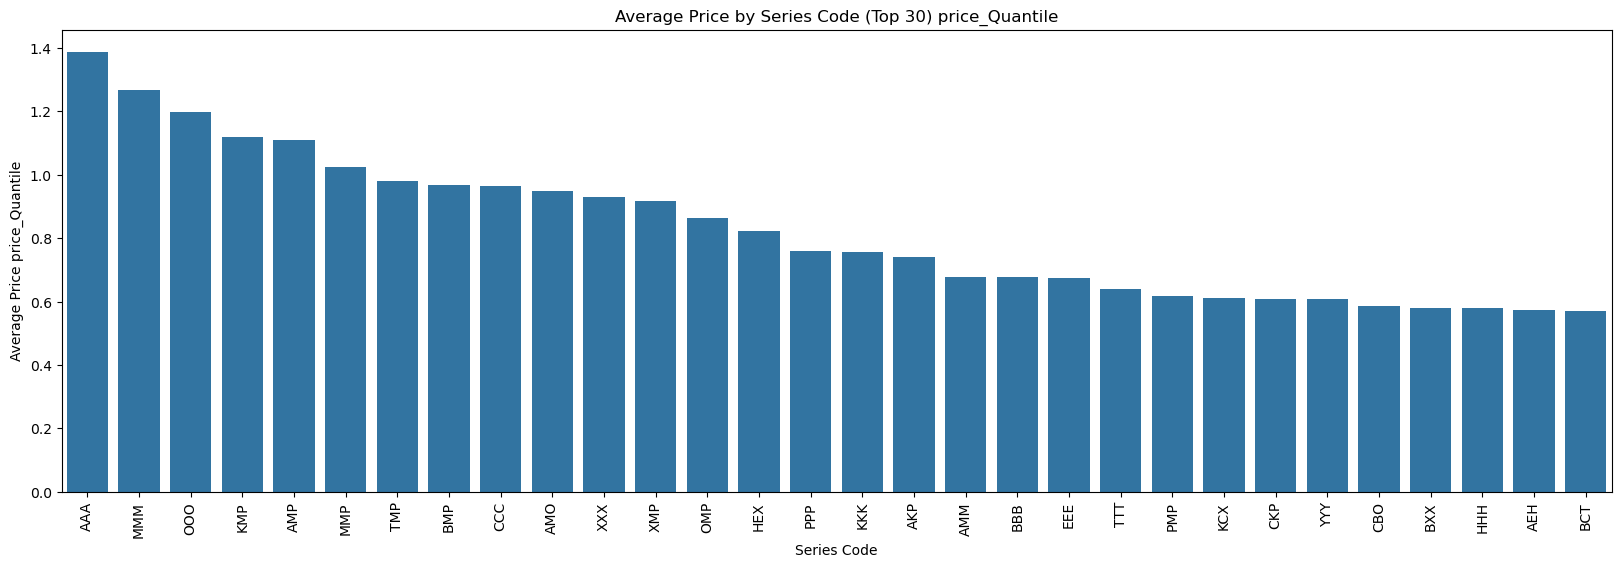

In [121]:
for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        plt.figure(figsize=(20, 6))
        series_avg_price = df.groupby('series')[transformed_column].mean().sort_values(ascending=False).head(30)
        plt.title(f'Average Price by Series Code (Top 30) {transformed_column}')
        plt.xticks(rotation=90)
        plt.xlabel('Series Code')
        plt.ylabel(f'Average Price {transformed_column}')
        sns.barplot(x = series_avg_price.index, y=series_avg_price.values)

## Encoding

In [79]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [81]:
encoded_array = encoder.fit_transform(df[['series_part_1']])

df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['series_part_1']))

df = pd.concat([df.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)

In [83]:
encoded_array = encoder.fit_transform(df[['series_part_2']])

df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['series_part_2']))

df = pd.concat([df.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)

In [85]:
df

,plate,date,price,price_transformed,plate_length,region,registration_code,series_part_1,series_part_2,series,...,series_part_2_YC,series_part_2_YE,series_part_2_YH,series_part_2_YK,series_part_2_YM,series_part_2_YO,series_part_2_YP,series_part_2_YT,series_part_2_YX,series_part_2_YY
0,X059CP797,2024-12-26 00:00:00,65000,11.082158,9,797,059,X,CP,XCP,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Y800MH790,2024-07-12 21:31:37,100000,11.512935,9,790,800,Y,MH,YMH,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A212TX77,2024-04-18 00:00:00,290000,12.577640,8,77,212,A,TX,ATX,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,P001AY199,2025-01-03 00:27:15,680000,13.478840,9,199,001,P,AY,PAY,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B400BB750,2022-04-09 00:00:00,50000,10.819798,9,750,400,B,BB,BBB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43600,X023PP797,2024-03-25 10:38:34,155000,11.553726,9,797,023,X,PP,XPP,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43601,M004KA161,2025-01-31 00:00:00,1600000,14.285515,9,161,004,M,KA,MKA,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43602,E888EB199,2025-02-06 00:00:00,850000,13.652993,9,199,888,E,EB,EEB,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43603,X023XK77,2024-04-24 11:30:07,150000,11.918397,8,77,023,X,XK,XXK,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
print(df.columns[:20])

Index(['plate', 'date', 'price', 'price_transformed', 'plate_length', 'region',
       'registration_code', 'series_part_1', 'series_part_2', 'series',
       'digit_symmetry', 'registration_symmetry', 'region_symmetry',
       'digits_frequency', 'region_frequency', 'registration_frequency',
       'series_symmetry', 'year', 'month', 'day'],
      dtype='object')


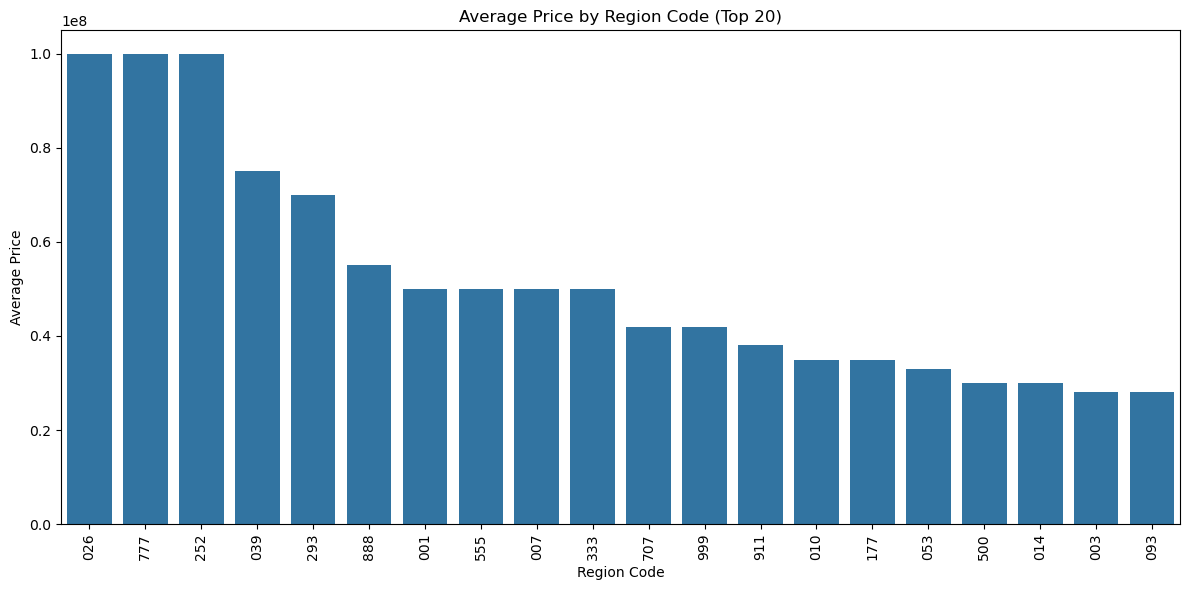

In [89]:
plt.figure(figsize=(12, 6))
region_avg_price = df.groupby('registration_code')['price'].max().sort_values(ascending=False).head(20)
sns.barplot(x=region_avg_price.index, y=region_avg_price.values)
plt.title('Average Price by Region Code (Top 20)')
plt.xticks(rotation=90)
plt.xlabel('Region Code')
plt.ylabel('Average Price')
plt.tight_layout()
plt.show()

In [91]:
df.columns[:20]

Index(['plate', 'date', 'price', 'price_transformed', 'plate_length', 'region',
       'registration_code', 'series_part_1', 'series_part_2', 'series',
       'digit_symmetry', 'registration_symmetry', 'region_symmetry',
       'digits_frequency', 'region_frequency', 'registration_frequency',
       'series_symmetry', 'year', 'month', 'day'],
      dtype='object')

In [93]:
def smape(actual, forecast):
    denominator = (np.abs(actual) + np.abs(forecast)) / 2.0
    diff = np.abs(actual - forecast) / denominator
    return 100 * np.mean(diff)

# Custom SMAPE evaluation
def smape_eval(y_pred, y_true):
    y_true = y_true.get_label()
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    return 'smape', 100 * np.mean(diff), False

In [101]:
from sklearn.preprocessing import PowerTransformer

df['price'] = df['price'] + 1e-5  # Avoid zero
transformers = {
    "Box-Cox": PowerTransformer(method="box-cox"),
    "Yeo-Johnson": PowerTransformer(method="yeo-johnson"),
    "Quantile": QuantileTransformer(output_distribution='normal')
}

for name, transformer in transformers.items():
    transformed = transformer.fit_transform(df[['price']])
    _, p_value = stats.shapiro(transformed.flatten())
    print(f"{name}: p-value = {p_value:.5f}")
    df[f'price_{name}'] = transformed.flatten()

Box-Cox: p-value = 0.00000
Yeo-Johnson: p-value = 0.00000
Quantile: p-value = 0.00000


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 43605.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 43605.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 43605.
  res = hypotest_fun_out(*samples, **kwds)


In [129]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import graphviz

# Custom SMAPE function
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    # Avoid division by zero issues:
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

# Custom metric for LightGBM (returns tuple: (eval_name, eval_result, is_higher_better))
def lgb_smape(y_pred, dataset):
    y_true = dataset.get_label()
    return 'SMAPE', smape(y_true, y_pred), False

# Assuming df is your DataFrame and 'price' is the target variable
features = [col for col in df.columns if col not in ['price', 'plate', 'date', 'price_transformed', 'series_part_1', 'series_part_2', 'series', 'price_Box-Cox', 'price_Yeo-Johnson', 'price_Quantile']]
X = df[features].apply(pd.to_numeric)
models = {}


for name, transformer in transformers.items():
    y = df[f'price_{name}']
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create LightGBM datasets
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
    
    # Define parameters for LightGBM
    params = {
        'objective': 'regression',
        'metric': 'None',  # We use a custom evaluation metric
        'learning_rate': 0.05,
        'num_leaves': 31,
        'verbose': -1,
        'seed': 42
    }
    
    # Train the model without verbose_eval parameter
    model = lgb.train(
        params,
        train_data,
        num_boost_round=1000,
        valid_sets=[train_data, val_data],
        valid_names=['train', 'valid'],
        feval=smape_eval,
    )
    
    # Predict on validation set and calculate SMAPE
    #y_pred = model.predict(X_val, num_iteration=model.best_iteration)
    #print("Validation SMAPE:", smape(y_val.values, y_pred))
    
    
    # Final SMAPE (on original scale)
    y_pred = model.predict(X_val)
    y_pred_original = transformer.inverse_transform(y_pred.reshape(-1, 1))
    y_val_original = transformer.inverse_transform(y_val.array.reshape(-1, 1))
    
    smape_score = smape(y_val_original.flatten(), y_pred_original.flatten())
    print(f"\nFinal SMAPE on validation set for {name}: {smape_score:.2f}%")
    models[name] = model
    
    # Generate a graph of the first tree using Graphviz
    tree_index = 0  # Change this to visualize other trees
    graph = lgb.create_tree_digraph(model, tree_index=tree_index)
    graph.render("lightgbm_tree", view=True)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(



Final SMAPE on validation set for Box-Cox: 40.91%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(



Final SMAPE on validation set for Yeo-Johnson: 40.87%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(



Final SMAPE on validation set for Quantile: 40.92%


In [142]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import graphviz

# Custom SMAPE function
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    # Avoid division by zero issues:
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

# Custom metric for LightGBM (returns tuple: (eval_name, eval_result, is_higher_better))
def lgb_smape(y_pred, dataset):
    y_true = dataset.get_label()
    return 'SMAPE', smape(y_true, y_pred), False

# Assuming df is your DataFrame and 'price' is the target variable
features = [col for col in df.columns if col not in ['price', 'plate', 'date', 'price_transformed', 'series_part_1', 'series_part_2', 'series']]
X = df[features].apply(pd.to_numeric)
y = df['price_transformed']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM Dataset
train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Parameters
params = {
    "objective": "regression",
    "boosting_type": "gbdt",
    "num_leaves": 15,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "min_data_in_leaf": 1,
    "lambda_l1": 0.1,
    "lambda_l2": 0.1,
    "verbose": -1
}

# Train with early stopping
model = lgb.train(
    params,
    train_data,
    num_boost_round=200,
    valid_sets=[val_data],
    feval=smape_eval,
    callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(period=1)]
)

# Final SMAPE (on original scale)
y_pred_log = model.predict(X_val)
y_pred = np.expm1(y_pred_log)
y_val_orig = np.expm1(y_val)
smape_score = smape(y_val_orig, y_pred)
print(f"\nFinal SMAPE on validation set: {smape_score:.2f}%")

# Generate a graph of the first tree using Graphviz
tree_index = 0  # Change this to visualize other trees
graph = lgb.create_tree_digraph(model, tree_index=tree_index)
graph.render("lightgbm_tree", view=True)

[1]	valid_0's l2: 1.3141	valid_0's smape: 7.60067
Training until validation scores don't improve for 20 rounds
[2]	valid_0's l2: 1.27991	valid_0's smape: 7.48785
[3]	valid_0's l2: 1.24392	valid_0's smape: 7.35826
[4]	valid_0's l2: 1.20957	valid_0's smape: 7.23454
[5]	valid_0's l2: 1.18363	valid_0's smape: 7.14584
[6]	valid_0's l2: 1.15502	valid_0's smape: 7.04137
[7]	valid_0's l2: 1.12919	valid_0's smape: 6.94721
[8]	valid_0's l2: 1.10592	valid_0's smape: 6.86168
[9]	valid_0's l2: 1.08489	valid_0's smape: 6.78949
[10]	valid_0's l2: 1.06351	valid_0's smape: 6.70711
[11]	valid_0's l2: 1.04331	valid_0's smape: 6.63071
[12]	valid_0's l2: 1.02369	valid_0's smape: 6.55421
[13]	valid_0's l2: 1.0078	valid_0's smape: 6.49482
[14]	valid_0's l2: 0.993532	valid_0's smape: 6.44066
[15]	valid_0's l2: 0.979742	valid_0's smape: 6.38942
[16]	valid_0's l2: 0.965672	valid_0's smape: 6.33378
[17]	valid_0's l2: 0.952731	valid_0's smape: 6.28745
[18]	valid_0's l2: 0.939089	valid_0's smape: 6.2353
[19]	valid

'lightgbm_tree.pdf'

In [146]:
!pip install optuna

DEPRECATION: Loading egg at /opt/anaconda3/lib/python3.12/site-packages/transnetv2-1.0.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached optuna-4.2.1-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.15.2-py3-none-any.whl.metadata (7.3 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached Mako-1.3.9-py3-none-any.whl.metadata (2.9 kB)


In [150]:
import optuna

def objective(trial):
    num_leaves = trial.suggest_int("num_leaves", 5, 100)

    params["num_leaves"] = num_leaves
    model = lgb.train(
        params,
        train_data,
        num_boost_round=500,
        valid_sets=[val_data],
        feval=lgb_smape,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=False)]
    )

    y_pred_log = model.predict(X_val)
    y_pred = np.expm1(y_pred_log)
    y_val_orig = np.expm1(y_val)
    return smape(y_val_orig, y_pred)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print(f"Best num_leaves: {study.best_params['num_leaves']}")


[I 2025-04-02 00:29:16,370] A new study created in memory with name: no-name-4329fa88-c2fe-4c22-ad3f-93452a71208c
[I 2025-04-02 00:29:17,528] Trial 0 finished with value: 41.36413256714111 and parameters: {'num_leaves': 99}. Best is trial 0 with value: 41.36413256714111.
[I 2025-04-02 00:29:17,850] Trial 1 finished with value: 46.78436706648243 and parameters: {'num_leaves': 6}. Best is trial 0 with value: 41.36413256714111.
[I 2025-04-02 00:29:18,520] Trial 2 finished with value: 42.56624346793612 and parameters: {'num_leaves': 33}. Best is trial 0 with value: 41.36413256714111.
[I 2025-04-02 00:29:19,106] Trial 3 finished with value: 42.84005410077973 and parameters: {'num_leaves': 24}. Best is trial 0 with value: 41.36413256714111.
[I 2025-04-02 00:29:20,201] Trial 4 finished with value: 41.414281336240435 and parameters: {'num_leaves': 95}. Best is trial 0 with value: 41.36413256714111.
[I 2025-04-02 00:29:20,891] Trial 5 finished with value: 42.308894872893745 and parameters: {'nu

Best num_leaves: 99


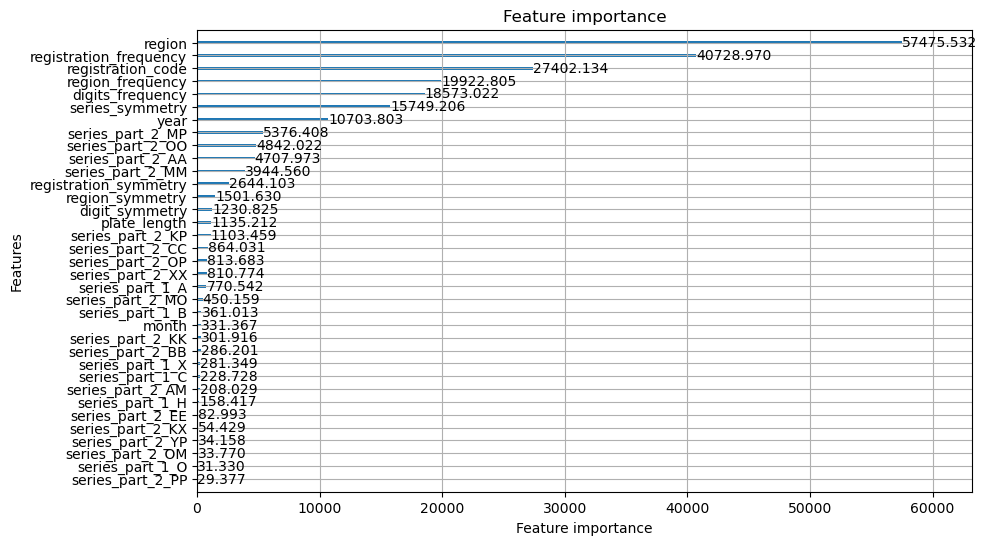

In [152]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Plot feature importance inside Jupyter Lab
lgb.plot_importance(model, importance_type="gain", figsize=(10, 6))
plt.show()